In [1]:
import pandas as pd
import yfinance as yf
from datetime import date, datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

c:\Users\Apurva\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Apurva\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
start_date = '2021-1-1'
end_date = '2024-1-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2021-1-1  End Date: 2024-1-1


In [3]:
# import yfinance as yf
# import pandas as pd

# # Download stock data for ZOMATO.NS
# df = yf.download('ZOMATO.NS', start='2021-01-01', end='2024-12-17')

# # Reset the index to create a 'Date' column
# df.reset_index(inplace=True)

# # Display the first few rows of the DataFrame
# print(df.head())

In [4]:
ticker = 'ZOMATO.NS'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089
...,...,...,...,...,...,...
2023-12-22,128.500000,128.500000,131.000000,125.300003,130.550003,63113800
2023-12-26,125.000000,125.000000,128.699997,124.300003,128.500000,25499782


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2021-07-23 to 2023-12-29
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, ZOMATO.NS)  604 non-null    float64
 1   (Close, ZOMATO.NS)      604 non-null    float64
 2   (High, ZOMATO.NS)       604 non-null    float64
 3   (Low, ZOMATO.NS)        604 non-null    float64
 4   (Open, ZOMATO.NS)       604 non-null    float64
 5   (Volume, ZOMATO.NS)     604 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.0 KB


In [6]:
df.isnull().sum()

Price      Ticker   
Adj Close  ZOMATO.NS    0
Close      ZOMATO.NS    0
High       ZOMATO.NS    0
Low        ZOMATO.NS    0
Open       ZOMATO.NS    0
Volume     ZOMATO.NS    0
dtype: int64

In [7]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Date'>

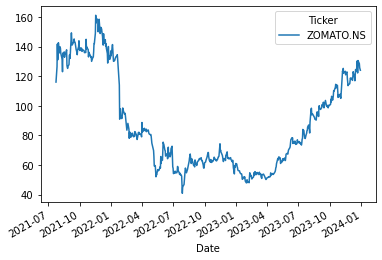

In [8]:
df['Open'].plot()

<AxesSubplot:xlabel='Date'>

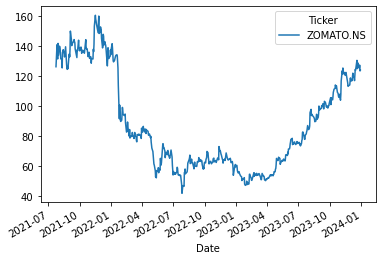

In [9]:
df['Close'].plot()

In [10]:
df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
df.head(14)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,
Date,,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290,126.000000
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854,133.324997
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900,133.183329
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731,132.687496
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089,134.459998
2021-07-30,133.500000,133.500000,142.699997,131.000000,142.600006,88312522,134.299998
2021-08-02,139.699997,139.699997,140.750000,135.149994,135.750000,66909732,135.071426
2021-08-03,139.399994,139.399994,140.800003,137.000000,137.000000,46610001,135.612497


<AxesSubplot:xlabel='Date'>

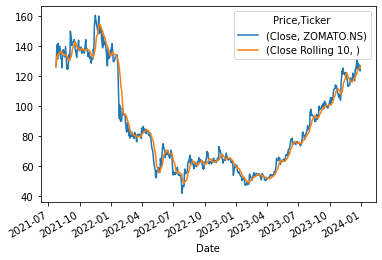

In [11]:
df[['Close','Close Rolling 10']].plot()

In [12]:
df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()

In [13]:
df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,
Date,,,,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290,126.000000,126.000000,126.000000
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854,133.324997,133.324997,133.324997
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900,133.183329,133.183329,133.183329
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731,132.687496,132.687496,132.687496
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089,134.459998,134.459998,134.459998
...,...,...,...,...,...,...,...,...,...
2023-12-22,128.500000,128.500000,131.000000,125.300003,130.550003,63113800,124.235000,120.270000,116.821000
2023-12-26,125.000000,125.000000,128.699997,124.300003,128.500000,25499782,124.890000,120.375000,117.141000


<AxesSubplot:xlabel='Date'>

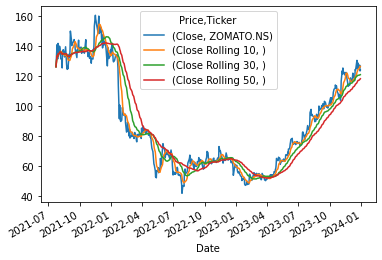

In [14]:
df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()

In [15]:
#cummulative MOving average
df['CMA']=df['Close'].expanding().mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,,
Date,,,,,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290,126.000000,126.000000,126.000000,126.000000
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854,133.324997,133.324997,133.324997,133.324997
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900,133.183329,133.183329,133.183329,133.183329
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731,132.687496,132.687496,132.687496,132.687496
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089,134.459998,134.459998,134.459998,134.459998
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,128.500000,128.500000,131.000000,125.300003,130.550003,63113800,124.235000,120.270000,116.821000,87.436833
2023-12-26,125.000000,125.000000,128.699997,124.300003,128.500000,25499782,124.890000,120.375000,117.141000,87.499334


<AxesSubplot:xlabel='Date'>

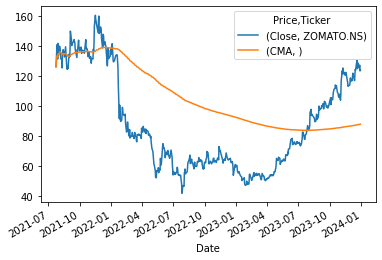

In [16]:
df[['Close','CMA']].plot()

In [17]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adf_test(df['Close'])

ADF Statistics: -1.2397218927651241
p- value: 0.6562793202598367
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,,,
Date,,,,,,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290,126.000000,126.000000,126.000000,126.000000,NaN
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854,133.324997,133.324997,133.324997,133.324997,14.649994
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900,133.183329,133.183329,133.183329,133.183329,-7.750000
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731,132.687496,132.687496,132.687496,132.687496,-1.699997
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089,134.459998,134.459998,134.459998,134.459998,10.350006


In [20]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -25.745020325304225
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

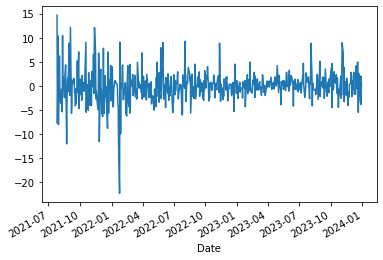

In [21]:
df['First Difference'].dropna().plot()

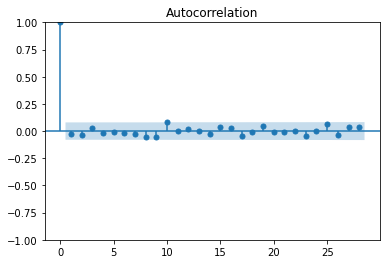

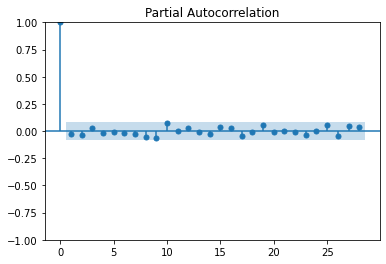

In [22]:
acf = plot_acf(df["First Difference"].dropna())
pacf = plot_pacf(df["First Difference"].dropna())

In [23]:
step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
step.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3095.233, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3089.015, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3090.408, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3090.356, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3087.015, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3091.636, Time=0.51 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.712 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  603
Model:                        SARIMAX   Log Likelihood               -1542.508
Date:                Thu, 19 Dec 2024   AIC                           3087.015
Time:                        22:26:59   BIC                           3091.417
Sample:                             0   HQIC                          3088.729
                                - 603                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.7594      0.268     36.454      0.000       9.235      10.284
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):              1169.81
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
model_ARIMA=ARIMA(df['Close'],order=(15,2,3))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\Apurva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Apurva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Apurva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Apurva\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

In [25]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ZOMATO.NS   No. Observations:                  604
Model:                ARIMA(15, 2, 3)   Log Likelihood               -1530.791
Date:                Thu, 19 Dec 2024   AIC                           3099.583
Time:                        22:27:04   BIC                           3183.188
Sample:                             0   HQIC                          3132.124
                                - 604                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7148      0.037    -19.269      0.000      -0.788      -0.642
ar.L2         -0.9915      0.043    -23.132      0.000      -1.076      -0.907
ar.L3         -0.0254      0.046     -0.546      0.585      -0.116       0.066
ar.L4         -0.0199      0.051     -0.387      0.698      -0.121       0.081
ar.L5          0.0088      0.066      0.134      0.894      -0.120       0.137
ar.L6         -0.0368      0.064     -0.577      0.564      -0.162       0.088
ar.L7         -0.0303      0.069     -0.442      0.659      -0.165       0.104
ar.L8         -0.0775      0.063     -1.233      0.218      -0.201       0.046
ar.L9         -0.1124      0.067     -1.689      0.091      -0.243       0.018
ar.L10        -0.0037      0.059     -0.063      0.950      -0.119       0.112
ar.L11         0.0130      0.067      0.194      0.846      -0.119       0.145
ar.L12         0.1191      0.066      1.814      0.070      -0.010       0.248
ar.L13         0.0320      0.071      0.453      0.651      -0.107       0.171
ar.L14        -0.0337      0.054     -0.628      0.530      -0.139       0.071
ar.L15         0.0234      0.042      0.563      0.574      -0.058       0.105
ma.L1         -0.3027      0.043     -7.058      0.000      -0.387      -0.219
ma.L2          0.2528      0.034      7.330      0.000       0.185       0.320
ma.L3         -0.9489      0.039    -24.088      0.000      -1.026      -0.872
sigma2         9.2599      0.442     20.929      0.000       8.393      10.127
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               816.81
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
df1 = yf.download(ticker,start='2024-12-1',end=date.today())
df1

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,,,
2024-12-02,282.500000,282.500000,285.700012,280.450012,281.899994,35170688
2024-12-03,279.850006,279.850006,282.350006,279.000000,279.700012,30078648
2024-12-04,286.250000,286.250000,288.000000,283.000000,283.000000,45520598
2024-12-05,299.350006,299.350006,304.649994,286.850006,288.250000,102148528
2024-12-06,302.950012,302.950012,303.899994,296.250000,300.000000,49309068
2024-12-09,295.299988,295.299988,304.700012,291.799988,304.700012,51131895
2024-12-10,295.850006,295.850006,299.450012,295.000000,296.750000,31333039
2024-12-11,291.799988,291.799988,294.299988,288.600006,290.000000,39053928


In [27]:
pred_arima=model_ARIMA_fit.predict(start=datetime(2023,12,8),end=datetime(2023,12,29))
residuals=df['Close']-pred_arima

#df.head()

#df.tail()

In [28]:
df.tail(15)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,,,
Date,,,,,,,,,,,
2023-12-08,119.949997,119.949997,123.900002,119.300003,123.000000,44213196,117.320000,116.271667,112.520,86.813136,-1.750000
2023-12-11,118.449997,118.449997,120.500000,117.550003,119.949997,32372287,117.840000,116.671667,112.891,86.866667,-1.500000
2023-12-12,116.750000,116.750000,119.300003,114.150002,119.000000,40800538,118.135000,117.041667,113.224,86.917145,-1.699997
2023-12-13,120.000000,120.000000,120.500000,116.150002,116.900002,48092329,118.475000,117.451667,113.625,86.972934,3.250000
2023-12-14,124.150002,124.150002,124.949997,120.500000,121.000000,74178495,119.035000,118.086667,114.078,87.035522,4.150002
2023-12-15,123.599998,123.599998,125.000000,122.400002,124.500000,39542770,119.764999,118.750000,114.444,87.096975,-0.550003
2023-12-18,128.550003,128.550003,129.199997,121.550003,123.400002,89553155,120.880000,119.450000,115.000,87.166527,4.950005
2023-12-19,130.250000,130.250000,131.750000,127.400002,129.000000,64117314,122.230000,119.908334,115.497,87.238693,1.699997


<AxesSubplot:xlabel='Date'>

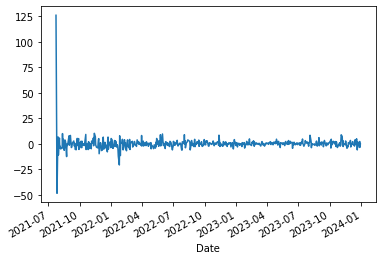

In [29]:
model_ARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

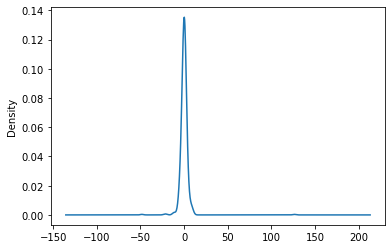

In [30]:
model_ARIMA_fit.resid.plot(kind='kde')

In [31]:
df['Predicted_ARIMA']=pred_arima

In [32]:
df.tail(15)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference,Predicted_ARIMA
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,,,,
Date,,,,,,,,,,,,
2023-12-08,119.949997,119.949997,123.900002,119.300003,123.000000,44213196,117.320000,116.271667,112.520,86.813136,-1.750000,120.521550
2023-12-11,118.449997,118.449997,120.500000,117.550003,119.949997,32372287,117.840000,116.671667,112.891,86.866667,-1.500000,119.738739
2023-12-12,116.750000,116.750000,119.300003,114.150002,119.000000,40800538,118.135000,117.041667,113.224,86.917145,-1.699997,118.878264
2023-12-13,120.000000,120.000000,120.500000,116.150002,116.900002,48092329,118.475000,117.451667,113.625,86.972934,3.250000,116.626660
2023-12-14,124.150002,124.150002,124.949997,120.500000,121.000000,74178495,119.035000,118.086667,114.078,87.035522,4.150002,120.023555
2023-12-15,123.599998,123.599998,125.000000,122.400002,124.500000,39542770,119.764999,118.750000,114.444,87.096975,-0.550003,124.152255
2023-12-18,128.550003,128.550003,129.199997,121.550003,123.400002,89553155,120.880000,119.450000,115.000,87.166527,4.950005,123.498922
2023-12-19,130.250000,130.250000,131.750000,127.400002,129.000000,64117314,122.230000,119.908334,115.497,87.238693,1.699997,127.748767


In [33]:
df['Predicted_ARIMA']=pred_arima
print(df['Predicted_ARIMA'].dropna())

Date
2023-12-08    120.521550
2023-12-11    119.738739
2023-12-12    118.878264
2023-12-13    116.626660
2023-12-14    120.023555
2023-12-15    124.152255
2023-12-18    123.498922
2023-12-19    127.748767
2023-12-20    130.607314
2023-12-21    125.564961
2023-12-22    126.731742
2023-12-26    128.450290
2023-12-27    124.629936
2023-12-28    126.397361
2023-12-29    123.809424
Name: Predicted_ARIMA, dtype: float64


<AxesSubplot:xlabel='Date'>

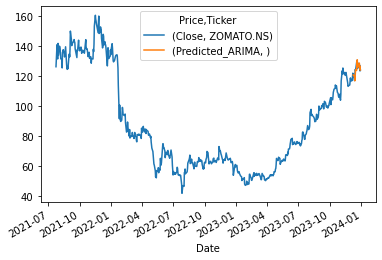

In [34]:
df[['Close','Predicted_ARIMA']].plot()

c:\Users\Apurva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Apurva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

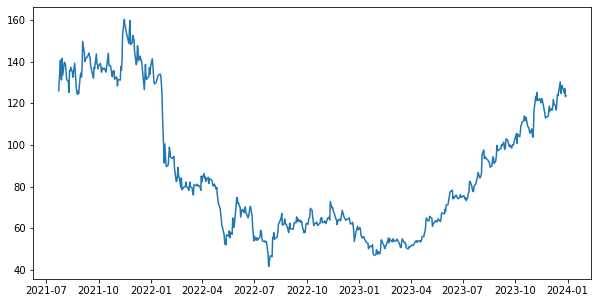

In [36]:
forecast_steps = 30
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=0), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.plot(df1['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
df1.reset_index(inplace=True)
df1.columns
forecat_res = pd.DataFrame({'Date':df1['Date'],})
# # Check the columns of df1
# print(df1.columns)

# # Assuming the correct column name is 'date' (lowercase) or something else, adjust accordingly
# # Create the DataFrame with the correct column name
# forecat_res = pd.DataFrame({'Date': df1['date']})  # Replace 'date' with the actual column name if different
 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Example data
data = {
    'Close': np.random.rand(100) * 100,  # Random closing prices
    'Predicted_ARIMA': np.random.rand(100) * 100  # Random predicted prices
}

# Create the DataFrame
df = pd.DataFrame(data)

# Get actual and predicted values
actual = df['Close']
predicted = df['Predicted_ARIMA'].dropna()

# Align the data to make sure we're comparing the same time periods
actual_aligned = actual.loc[predicted.index]

# Calculate various accuracy metrics
mae = mean_absolute_error(actual_aligned, predicted)
mse = mean_squared_error(actual_aligned, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual_aligned, predicted)

# Calculate percentage accuracy using MAPE (Mean Absolute Percentage Error)
# Ensure to handle division by zero
mape = np.mean(np.abs((actual_aligned - predicted) / actual_aligned.replace(0, np.nan))) * 100
accuracy = 100 - mape

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared Score: {r2:.4f}')
print(f'Model Accuracy: {accuracy:.2f}%')

# Optional: Calculate directional accuracy (how well the model predicts price movements)
actual_direction = np.sign(actual_aligned.diff().dropna())
predicted_direction = np.sign(predicted.diff().dropna())

# Align the two Series
actual_direction, predicted_direction = actual_direction.align(predicted_direction, join='inner')

# Calculate directional accuracy
directional_accuracy = np.mean(actual_direction == predicted_direction) * 100

print(f'Directional Accuracy: {directional_accuracy:.2f}%')

Mean Absolute Error: 32.38
Root Mean Squared Error: 39.67
R-squared Score: -0.7472
Model Accuracy: -3290.99%
Directional Accuracy: 53.54%
